## 회귀
* 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
* 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
* 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_excel('dataset/auto-mpg.xlsx')
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [41]:
import warnings
warnings.filterwarnings('ignore')
ndf['horsepower'] = ndf.horsepower.replace('?',np.nan)
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


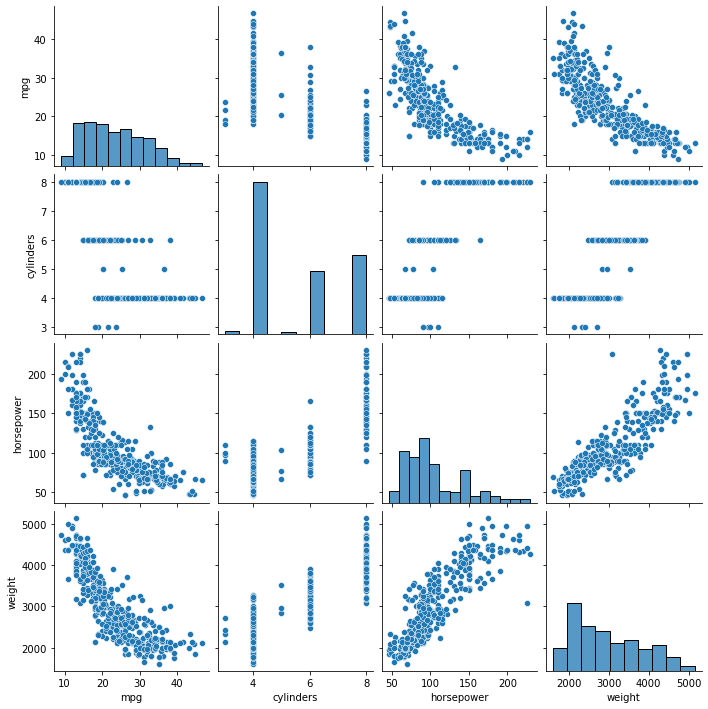

In [17]:
sns.pairplot(ndf)

In [50]:
# 변수(속성) 선택
X = ndf[['weight']] # 독립변수
y = ndf['mpg'] # 종속변수

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=0)

In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
y_preds[:5]

array([29.87615997, 23.98012273, 11.91058769, 29.87615997, 29.7220152 ])

### 회귀 평가 지표
* MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
* MSE: 실제값과 예측값의 차이를 제곱해 평균한 것
* RMSE: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
* R square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:20.642, RMSE:4.543, R2 score:0.664


In [23]:
print('기울기 a :', lr.coef_)
print('절편 b:', lr.intercept_)

기울기 a : [-0.00762163]
절편 b: 45.971217704757684


<AxesSubplot:ylabel='Frequency'>

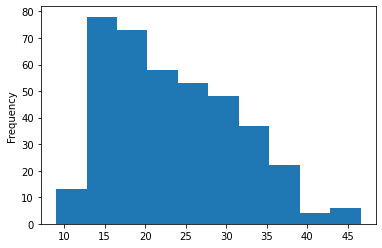

In [24]:
y.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

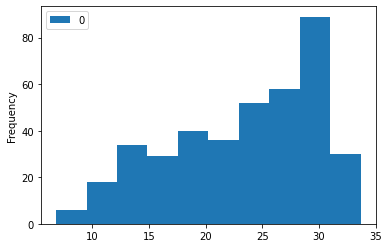

In [26]:
y_hat = lr.predict(X)
pd.DataFrame(y_hat).plot(kind='hist')

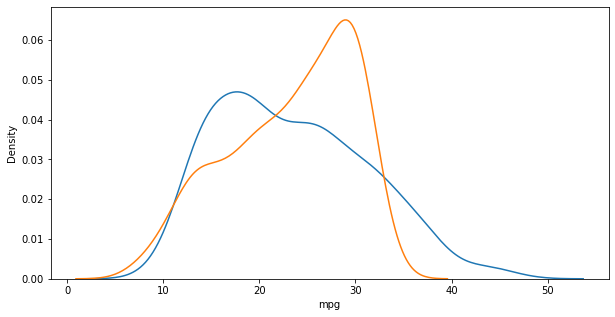

In [27]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label="y")
ax2 = sns.distplot(y_hat,hist=False,label="y_hat")

#### 다항 회귀분석
* 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 
형태의 회귀선을 표현할 수 있음
* 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
* 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [53]:
# 변수(속성) 선택
X = ndf[['weight']] # 독립변수
y = ndf['mpg'] # 종속변수

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=0)

In [54]:
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변환

print(X_train.shape)
print(X_train_poly.shape)
print(X_train_poly[:5])

(274, 1)
(274, 3)
[[1.0000000e+00 2.7200000e+03 7.3984000e+06]
 [1.0000000e+00 3.9070000e+03 1.5264649e+07]
 [1.0000000e+00 2.3000000e+03 5.2900000e+06]
 [1.0000000e+00 2.0650000e+03 4.2642250e+06]
 [1.0000000e+00 4.6330000e+03 2.1464689e+07]]


In [55]:
# score 사용
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.6721104316263573

In [58]:
# r2_score() 사용
from sklearn.metrics import r2_score
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
y_preds_poly = pr.predict(X_test_poly)
r_square= r2_score(y_test,y_preds_poly)
r_square

0.6721104316263573

Text(0, 0.5, 'mpg')

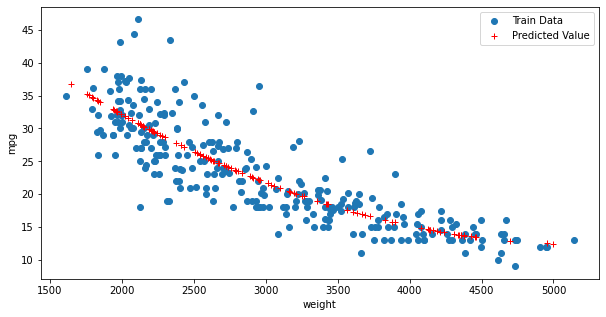

In [56]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test, 'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')


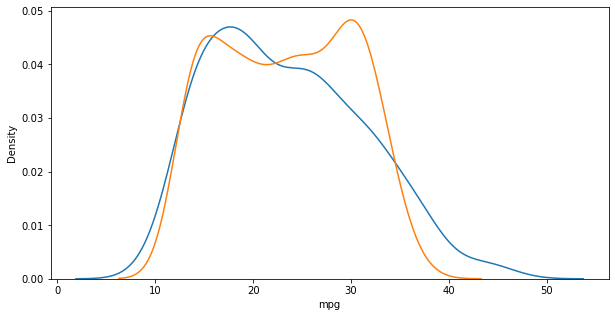

In [59]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')

## 다중 회귀분석
* 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
* 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습

In [62]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [66]:
X=ndf[['cylinders','horsepower','weight']]
y=ndf['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r2 = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:19.674, RMSE:4.436, R2 score:0.680


In [67]:
print('X변수의 계수:', lr.coef_)
print('절편:', lr.intercept_)

X변수의 계수: [-0.57598375 -0.03393439 -0.00537578]
절편: 45.99088694107766


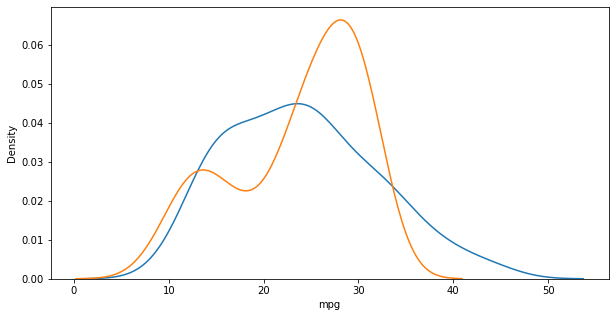

In [68]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1=sns.distplot(y_test,hist=False,label='y_test')
ax2=sns.distplot(y_hat,hist=False,label="y_hat")


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

ndf_ms = scaler.fit_transform(ndf)
ndf_ms_df = pd.DataFrame(data=ndf_ms,columns=ndf.columns)
ndf_ms_df.head()

,mpg,cylinders,horsepower,weight
0,0.239362,1.0,0.456522,0.536150
1,0.159574,1.0,0.646739,0.589736
2,0.239362,1.0,0.565217,0.516870
3,0.186170,1.0,0.565217,0.516019
4,0.212766,1.0,0.510870,0.520556


In [76]:
# R-squared 구하기
X = ndf_ms_df[['cylinders', 'horsepower', 'weight']]
y = ndf_ms_df['mpg']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
r2 = lr.score(X_test, y_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print(f'MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2 score:{r2:.3f}')


MSE:0.014, RMSE:0.118, R2 score:0.680


In [75]:
X = ndf_ms_df[['cylinders','horsepower','weight']]
y = ndf_ms_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r2 = r2_score(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}, RMSE: {rmse:.3f}, R2 score: {r2:.3f}')


MSE: 0.014, RMSE: 0.118, R2 score: 0.680


<AxesSubplot:xlabel='mpg', ylabel='Density'>

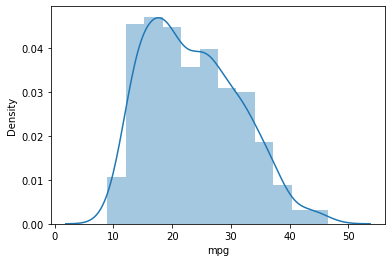

In [77]:
sns.distplot(ndf.mpg)

<AxesSubplot:title={'center':'Standard Transformed npg Histogram'}, ylabel='Density'>

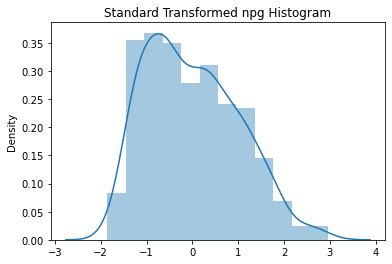

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(ndf[['mpg']])
scaled_data_df = pd.DataFrame(data=scaled_data)

sns.distplot(scaled_data_df)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

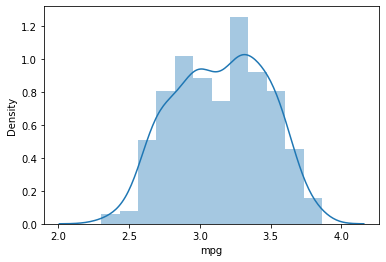

In [79]:
log_mpg = np.log1p(ndf['mpg'])
sns.distplot(log_mpg)

In [ ]:
# 과제 
# Q.로그 변환된 종속변수를 적용하여 다중회귀 분석 결과를 평가하세요.
# (r_square, 로그 변환된 MSE, RMSE) 

[-0.09398496  1.97368421 -1.73684211]
          2
-0.09398 x + 1.974 x - 1.737


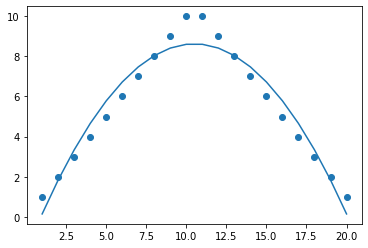

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20]
y = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,10,  9,  8,  7,  6,  5,  4,  3,  2,  1]

curve = np.polyfit(x,y,2)
poly = np.poly1d(curve)
print(curve)
print(poly)
new_x = []
new_y = []
for i in range(20):
    new_x.append(i+1)
    calc = poly(i+1)
    new_y.append(calc)
plt.scatter(x,y)
plt.plot(new_x,new_y)